In [123]:
import pandas as pd
import numpy as np

df_IBM = pd.read_csv("IBM.csv")
df_NASDAQ = pd.read_csv("NASDAQ.csv")

df_IBM.drop(["Adj Close"], axis=1, inplace=True)
df_NASDAQ.drop(["Adj Close"], axis=1, inplace=True)

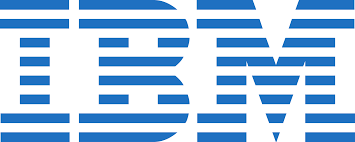

In [124]:
xls = pd.ExcelFile("Historical_series.xlsx")
IBM = pd.read_excel(xls, "IBM", header=None).drop([0])
new_header=IBM.iloc[0]
IBM= IBM[0:] # QUA HO SOSTITUITO 1: CON 0: ALTRIMENTI PERDEVAMO LA PRIMA RIGA DI DATI, DA NON FARE 3 RIGHE SOTTO LI 1 è GIUSTO
IBM.columns=new_header
#IBM.drop(IBM.columns[2], axis = 1)
IBM= IBM[1:]
IBM.columns=new_header

IBM = IBM.loc[:, IBM.columns.notna()]
df = IBM.T.drop_duplicates().T

In [81]:
df1 = df.dropna(axis=1)
df2 = df1.drop("Date", axis = 1)
df2 = df2.reset_index(drop=True)

1,Date,AdjClose,AdjClose,AdjClose
2,1999-12-31,4069.310059,NaN,NaN
3,2000-01-03,4131.149902,NaN,NaN
4,2000-01-04,3901.689941,NaN,NaN
5,2000-01-05,3877.540039,NaN,NaN
6,2000-01-06,3727.129883,NaN,NaN
...,...,...,...,...
5563,2022-02-07,14015.669922,13920.069043,14972.665566
5564,2022-02-08,14194.450195,13985.585059,14946.721367
5565,2022-02-09,14490.370117,14080.410059,14920.872168
5566,2022-02-10,14185.639648,14163.695996,14893.831152


In [4]:
IBM_final = df_IBM.join(df2.set_index(df_IBM.index))

In [5]:
IBM_final["SPD_OPEN/CLOSE"] = (
    IBM_final["Close"] - IBM_final["Open"]
    )
IBM_final["SPD_HIGH/LOW"] = (
    IBM_final["High"] - IBM_final["Low"]
    )

#calculate the %price variation of IBM stock
IBM_final["prevAdjClose"] = IBM_final.AdjClose.shift(1)
IBM_final["%varAdjClose"] = ((IBM_final["AdjClose"] / IBM_final["prevAdjClose"])-1)*100

In [6]:
pd.to_datetime(IBM_final["Date"])
IBM_final=IBM_final.set_index("Date")

In [7]:
#AVARAGE MEAN

IBM_final["avg10"] = IBM_final["AdjClose"].rolling(window =10).mean()
IBM_final["avg50"] = IBM_final["AdjClose"].rolling(window =50).mean()
IBM_final["avg200"] = IBM_final["AdjClose"].rolling(window =200).mean()

In [8]:
#POSITIVE AND NEGATIVE COUNTING 

pos_count_IBM, neg_count_IBM = 0, 0
  
# iterating each number in list
for num in IBM_final["%varAdjClose"]:
      
    # checking condition
    if num >= 0:
        pos_count_IBM += 1
  
    else:
        neg_count_IBM += 1
          
print("Positive closing IBM: ", pos_count_IBM)
print("Negative closing IBM: ", neg_count_IBM)

Positive closing IBM:  2854
Negative closing IBM:  2712


In [9]:
#AdjClose to BINARY

positive_string_IBM = []

for i in IBM_final["%varAdjClose"]:
    if i > 0:
        positive_string_IBM.append(1)
    else:
        positive_string_IBM.append(0)
        
IBM_final["pos_string"] = positive_string_IBM

In [10]:
cum_pos_AdjClose = []

for i in IBM_final["pos_string"]:
    if i == 1:
        cum_pos_AdjClose.append(+1)
    else:
        cum_pos_AdjClose.append(0)

IBM_final["cum_pos_AdjClose"] = cum_pos_AdjClose

In [11]:
def cumsumWithReset(df):
    # Make the cumulative sum of the column "counting"
    # When the value of "counting" is zero, then reset the cumulative sum
    prevVal = 0
    IBM_final["cumsum"] = 0
    for index, row in IBM.iterrows():
        cumsum = row["counting"] + prevVal
        if row['counting'] == 0:
            cumsum = 0
        prevVal = cumsum
        IBM.loc[index, 'cumsum'] = cumsum
    return IBM_final

In [12]:
IBM_final = IBM_final.fillna(0)

In [13]:
IBM_final.head(200)

,Open,High,Low,Close,Volume,AdjClose,SPD_OPEN/CLOSE,SPD_HIGH/LOW,prevAdjClose,%varAdjClose,avg10,avg50,avg200,pos_string,cum_pos_AdjClose
Date,,,,,,,,,,,,,,,
1999-12-31,104.385757,104.684509,101.935944,103.130974,3002334,61.780476,-1.254783,2.748565,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
2000-01-03,107.492828,110.898659,106.955070,110.898659,10823694,66.433693,3.405831,3.943589,61.780476,7.531857,0.000000,0.000000,0.000000,1,1
2000-01-04,108.986618,109.464630,105.999046,107.134323,8606279,64.178642,-1.852295,3.465584,66.433693,-3.394438,0.000000,0.000000,0.000000,0,0
2000-01-05,107.970840,114.483749,107.194077,110.898659,13318927,66.433693,2.927819,7.289672,64.178642,3.513709,0.000000,0.000000,0.000000,1,1
2000-01-06,112.810707,113.706978,108.508606,108.986618,8338607,65.288307,-3.824089,5.198372,66.433693,-1.724104,0.000000,0.000000,0.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2000-10-09,110.838913,114.125237,109.285370,112.750954,5123308,67.771698,1.912041,4.839867,66.658325,1.670268,66.363849,70.151446,0.000000,1,1
2000-10-10,111.496178,111.974190,107.492828,109.823135,5872453,66.011887,-1.673043,4.481362,67.771698,-2.596676,66.119626,70.183057,0.000000,0,0
2000-10-11,106.955070,107.970840,102.772469,107.074570,9179487,64.359756,0.119500,5.198371,66.011887,-2.502777,65.774837,70.201715,0.000000,0,0


In [14]:
IBM_final["SPD_OPEN/CLOSE"].astype('float').describe().to_frame()

,SPD_OPEN/CLOSE
count,5566.000000
mean,0.055991
std,1.466053
min,-10.635757
25%,-0.717018
50%,0.047791
75%,0.822181
max,10.396744


In [15]:
IBM_final["Open"].describe()

count    5566.000000
mean      123.826012
std        35.058342
min        52.246655
25%        92.676864
50%       120.420647
75%       148.023422
max       205.908218
Name: Open, dtype: float64

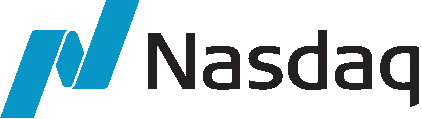

In [16]:
NASDAQ = pd.read_excel(xls, 'Nasdaq', header=None).drop([0])
new_header=NASDAQ.iloc[0]
NASDAQ= NASDAQ[0:]
NASDAQ.columns=new_header
NASDAQ= NASDAQ[1:]
NASDAQ.columns=new_header

In [17]:
NASDAQ = NASDAQ.loc[:, NASDAQ.columns.notna()]
df = NASDAQ.T.drop_duplicates().T

In [18]:
df1 = df.dropna(axis=1)
df2 = df1.drop("Date", axis = 1)
df2 = df2.reset_index(drop=True)

In [19]:
NASDAQ_final = df_NASDAQ.join(df2.set_index(df_IBM.index))
pd.to_datetime(NASDAQ_final["Date"])
NASDAQ_final=NASDAQ_final.set_index("Date")

In [20]:
NASDAQ_final["SPD_OPEN/CLOSE"] = (
    NASDAQ_final["Close"] - NASDAQ_final["Open"]
    )
NASDAQ_final["SPD_HIGH/LOW"] = (
    NASDAQ_final["High"] - NASDAQ_final["Low"]
    )

#calculate the %price variation of NASDAQ stock
NASDAQ_final["prevAdjClose"] = NASDAQ_final.AdjClose.shift(1)
NASDAQ_final["%var"] = ((NASDAQ_final["AdjClose"] / NASDAQ_final["prevAdjClose"])-1)*100

In [21]:
NASDAQ_final

,Open,High,Low,Close,Volume,AdjClose,SPD_OPEN/CLOSE,SPD_HIGH/LOW,prevAdjClose,%var
Date,,,,,,,,,,
1999-12-31,4056.989990,4082.370117,4032.330078,4069.310059,762980000,4069.310059,12.320069,50.040039,NaN,NaN
2000-01-03,4186.189941,4192.189941,3989.709961,4131.149902,1510070000,4131.149902,-55.040039,202.479980,4069.310059,1.519664
2000-01-04,4020.000000,4073.250000,3898.229980,3901.689941,1511840000,3901.689941,-118.310059,175.020020,4131.149902,-5.554385
2000-01-05,3854.350098,3924.209961,3734.870117,3877.540039,1735670000,3877.540039,23.189941,189.339844,3901.689941,-0.61896
2000-01-06,3834.439941,3868.760010,3715.620117,3727.129883,1598320000,3727.129883,-107.310058,153.139893,3877.540039,-3.87901
...,...,...,...,...,...,...,...,...,...,...
2022-02-07,14118.790039,14236.309570,13974.099609,14015.669922,4253020000,14015.669922,-103.120117,262.209961,14098.009766,-0.584053
2022-02-08,13984.429688,14226.480469,13934.780273,14194.450195,4277150000,14194.450195,210.020507,291.700196,14015.669922,1.275574
2022-02-09,14368.160156,14490.719727,14330.870117,14490.370117,4713210000,14490.370117,122.209961,159.849610,14194.450195,2.084758


In [22]:
NASDAQ_final["Open"].describe()

count     5566.000000
mean      4326.497823
std       3276.105267
min       1116.760010
25%       2134.775024
50%       2825.155029
75%       5161.312622
max      16120.919922
Name: Open, dtype: float64

In [23]:
NASDAQ_final["SPD_OPEN/CLOSE"].astype('float').describe().to_frame()

,SPD_OPEN/CLOSE
count,5566.000000
mean,-0.374017
std,59.054913
min,-498.219726
25%,-18.917420
50%,2.475097
75%,21.050049
max,427.689453


## **Graphing the recessions periods**


In [179]:
import matplotlib.pyplot as plt

# read in data
rec_data = pd.read_csv("USREC.csv") # download the US recession periods from FRED.com




In [180]:
IBM_rec= df

In [181]:
IBM_rec["Date"]=pd.to_datetime(IBM_rec["Date"])
rec_data["DATE"] = pd.to_datetime(rec_data["DATE"])

C:\Users\miro\AppData\Local\Temp/ipykernel_10088/2008783686.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  IBM_rec["Date"]=pd.to_datetime(IBM_rec["Date"])


In [182]:
rec_data["USREC"] = np.where(rec_data['USREC']==1, 150 , 0) # enlarging data for data visualization


In [183]:
IBM_rec=IBM_rec.iloc[:,~IBM_rec.columns.duplicated()]


In [184]:
dy = rec_data.set_index('DATE').resample('D').ffill().reset_index() #resampling recession data to daily to keep it uniform with stock data


(10592.0, 18993.0)

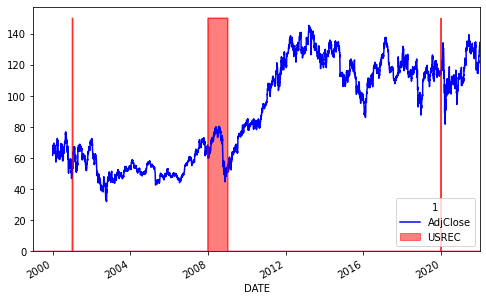

In [185]:
fig, ax = plt.subplots()
IBM_rec.plot.line(ax=ax, figsize=(8, 5), x='Date', color="blue")
dy.plot.area(ax=ax, figsize=(8, 5), x='DATE', alpha=0.5, color="red")
plt.xlim("1999-01-01", "2022-01-01")
